# **[Maximum Score from Performing Multiplication Operations](https://leetcode.com/explore/learn/card/dynamic-programming/631/strategy-for-solving-dp-problems/4146/)**

### Recursion
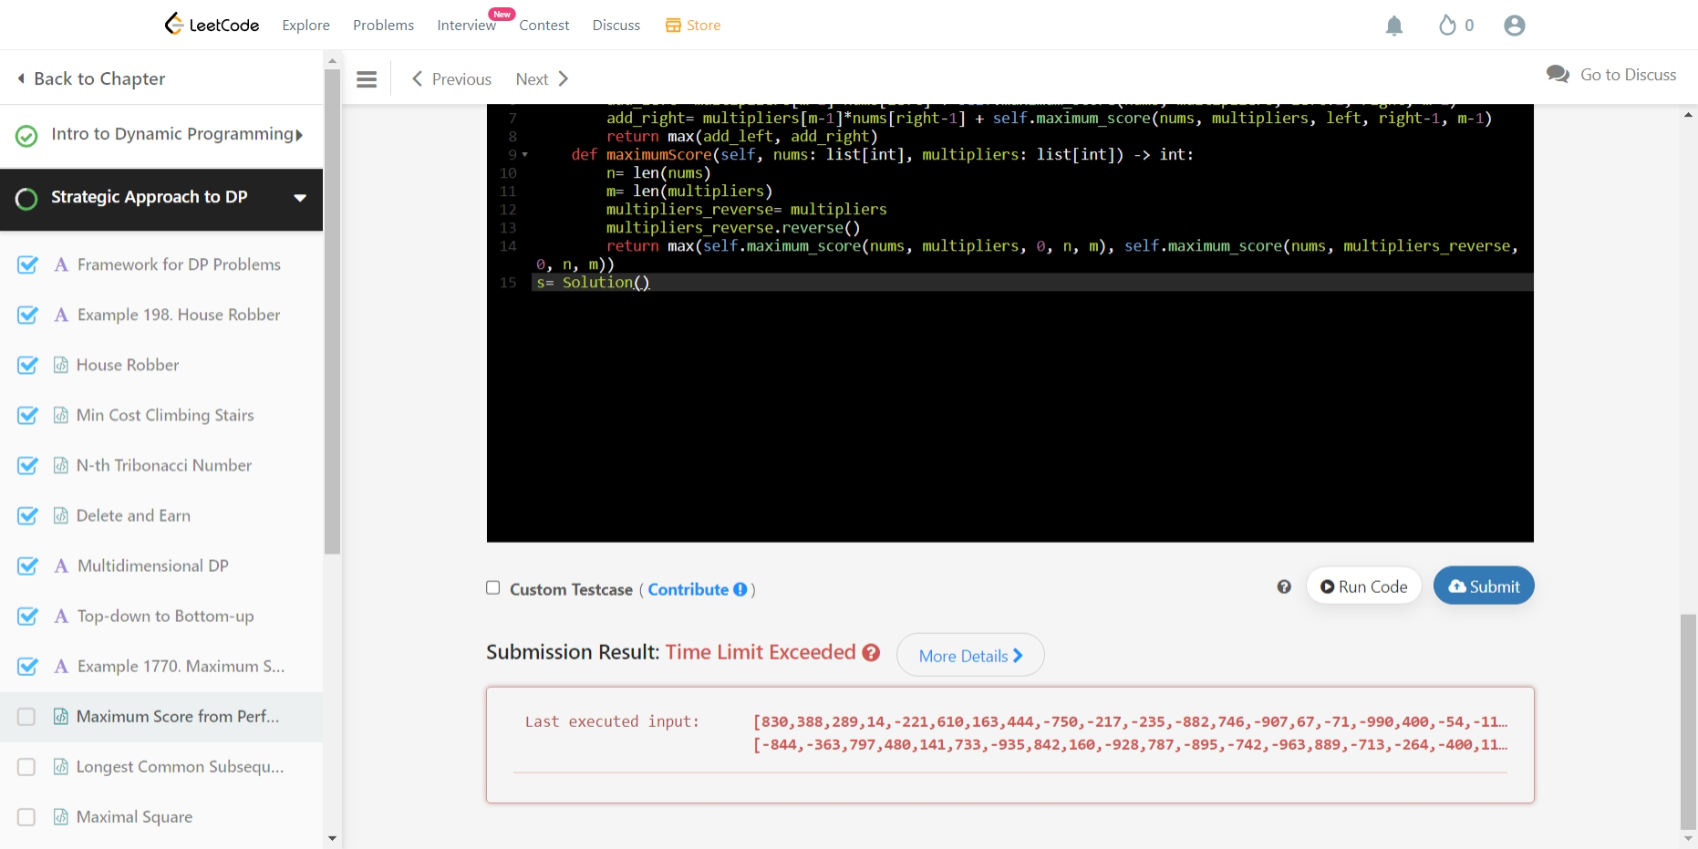

In [35]:
from typing import List
class Solution:
    def maximum_score(self, nums, multipliers, left, right, m):
        # Base condition
        if m==0:
            return 0
        add_left= multipliers[m-1]*nums[left] + self.maximum_score(nums, multipliers, left+1, right, m-1)
        add_right= multipliers[m-1]*nums[right-1] + self.maximum_score(nums, multipliers, left, right-1, m-1)
        return max(add_left, add_right)
        
    def maximumScore(self, nums: List[int], multipliers: List[int]) -> int:
        n= len(nums)
        m= len(multipliers)
        multipliers_reverse= multipliers
        multipliers_reverse.reverse()
        return max(self.maximum_score(nums, multipliers, 0, n, m), self.maximum_score(nums, multipliers_reverse, 0, n, m))
s= Solution()

In [36]:
nums = [1,2,3]
multipliers = [3,2,1]
# Output: 14
s.maximumScore(nums, multipliers)

14

In [37]:
nums = [-5,-3,-3,-2,7,1]
multipliers = [-10,-5,3,4,6]
# Output: 102
s.maximumScore(nums, multipliers)

102

## **Leetcode** -- `memoization`

In [18]:
from functools import lru_cache
from typing import List
class Solution:
    def maximumScore(self, nums: List[int], multipliers: List[int]) -> int:
        # lru_cache from functools automatically memoizes the function
        @lru_cache(2000)
        def dp(i, left):
            # Base case
            if i == m:
                return 0

            mult = multipliers[i]
            right = n - 1 - (i - left)
            
            # Recurrence relation
            return max(mult * nums[left] + dp(i + 1, left + 1), 
                       mult * nums[right] + dp(i + 1, left))
                       
        n, m = len(nums), len(multipliers)
        return dp(0, 0)

s= Solution()

In [76]:
class Solution:
    def maximumScore(self, nums: List[int], multipliers: List[int]) -> int:
        n= len(nums)
        m= len(multipliers)
        
        t= [[-1 for i in range(n+1)] for i in range(m+1)]
        
        def max_score(current, left):
            # current ----> current index
            # left    ----> left index
            
            # Base condition
            if current==m:
                return 0
            
            if t[current][left]!=-1:
                return t[current][left]
            
            right= (n-1) - (current-left) # last_idx_nums - current_idx_multipliers + left_idx_nums  
            
            add_left= multipliers[current]*nums[left] + max_score(current+1, left+1)
            add_right= multipliers[current]*nums[right] + max_score(current+1, left)
            t[current][left]= max(add_left, add_right)
            return t[current][left]

        
        return max_score(0, 0)

s= Solution()

In [77]:
nums = [1,2,3]
multipliers = [3,2,1]
# Output: 14
s.maximumScore(nums, multipliers)

14

In [78]:
nums = [-5,-3,-3,-2,7,1]
multipliers = [-10,-5,3,4,6]
# Output: 102
s.maximumScore(nums, multipliers)

102

### Bottom Up (Tabulation)

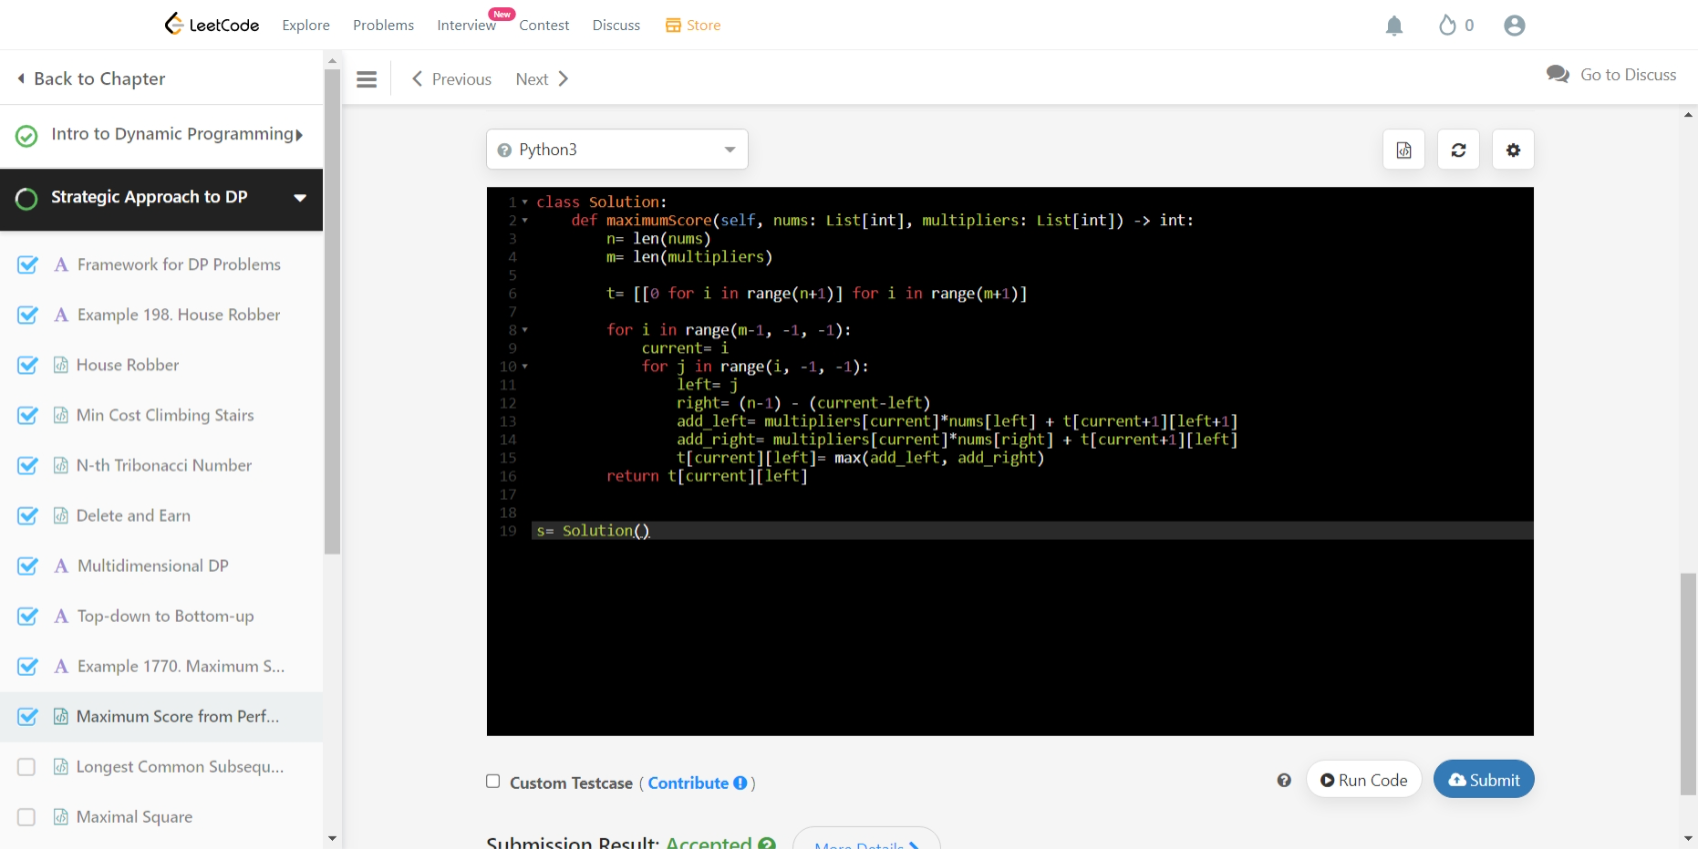

In [83]:
class Solution:
    def maximumScore(self, nums: List[int], multipliers: List[int]) -> int:
        n= len(nums)
        m= len(multipliers)
        
        t= [[0 for i in range(n+1)] for i in range(m+1)]

        for i in range(m-1, -1, -1):
            current= i
            for j in range(i, -1, -1):
                left= j
                right= (n-1) - (current-left)
                add_left= multipliers[current]*nums[left] + t[current+1][left+1]
                add_right= multipliers[current]*nums[right] + t[current+1][left]
                t[current][left]= max(add_left, add_right)
        return t[current][left]


s= Solution()

In [84]:
nums = [1,2,3]
multipliers = [3,2,1]
# Output: 14
s.maximumScore(nums, multipliers)

14

In [85]:
nums = [-5,-3,-3,-2,7,1]
multipliers = [-10,-5,3,4,6]
# Output: 102
s.maximumScore(nums, multipliers)

102

# NEED TO MEMOIZE THIS

In [96]:
from typing import List
class Solution:
    def maximum_score(self, nums, multipliers, left, right, m, temp= True):
        if temp:
            self.t= [-1 for i in range(m+1)]
            temp= False

        # Base condition
        if m==0:
            return 0

        # if self.t[m]!=-1:
        #     return self.t[m]

        add_left= multipliers[m-1]*nums[left] + self.maximum_score(nums, multipliers, left+1, right, m-1, temp)
        add_right= multipliers[m-1]*nums[right-1] + self.maximum_score(nums, multipliers, left, right-1, m-1, temp)
        self.t[m]= max(add_left, add_right)
        return self.t[m]
        
    def maximumScore(self, nums: List[int], multipliers: List[int]) -> int:
        n= len(nums)
        m= len(multipliers)
        multipliers_reverse= multipliers
        multipliers_reverse.reverse()
        return max(self.maximum_score(nums, multipliers, 0, n, m), self.maximum_score(nums, multipliers_reverse, 0, n, m))
s= Solution()

In [97]:
nums = [1,2,3]
multipliers = [1, 2]
# Output: 3
s.maximumScore(nums, multipliers)

7

In [98]:
nums = [1,2,3]
multipliers = [3,2,1]
# Output: 14
s.maximumScore(nums, multipliers)

14

In [88]:
nums = [-5,-3,-3,-2,7,1]
multipliers = [-10,-5,3,4,6]
# Output: 102
s.maximumScore(nums, multipliers)

102